# 라이브러리

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import traceback
import datetime
from datetime import timedelta
from datetime import date
#from datetime import datetime

# 데이터 분석 기본 라이브러리 관련
import os
import sys
import platform
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook

# EDA 관련
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import missingno as msno

# 데이터 전처리 관련
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from matplotlib.dates import YearLocator, MonthLocator
import matplotlib.cm as cm

In [2]:
warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200
plt.style.use('ggplot')

current_os = platform.platform().split("-")[0]
if current_os == 'Windows':
    print(f'현재 사용되는 운영체제: {current_os}')
    plt.rc('font', family='Malgun Gothic') # For Windows
    plt.rc("axes",unicode_minus=False)
elif current_os == 'Darwin': # macOS
    print(f"본 내용은 Windows 환경에서 분석됐습니다. 다른 OS로 하시게 될 경우 에러가 날 수 있습니다.")
    plt.rc('font', family='AppleGothic') # For Windows

현재 사용되는 운영체제: Windows


# 데이터 불러오기

In [3]:
SK하이닉스=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/SK하이닉스.csv',encoding='utf-8')
CJ대한통운=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/CJ대한통운.csv',encoding='utf-8')
DGB금융지주=pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/DGB금융지주.csv',encoding='utf-8')
GS건설 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/GS건설.csv',encoding='utf-8')
데일리블록체인 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/데일리블록체인.csv',encoding='utf-8')
미스터블루 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/미스터블루.csv',encoding='utf-8')
삼성전자 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/삼성전자.csv',encoding='utf-8')
셀트리온 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/셀트리온.csv',encoding='utf-8')
소리바다 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/소리바다.csv',encoding='utf-8')
씨젠 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/씨젠.csv',encoding='utf-8')
아모레퍼시픽 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/아모레퍼시픽.csv',encoding='utf-8')
우리들휴브레인 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/우리들휴브레인.csv',encoding='utf-8')
한화솔루션 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/한화솔루션.csv',encoding='utf-8')
현대차 =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/현대차.csv',encoding='utf-8')
NAVER =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/NAVER.csv',encoding='utf-8')

In [4]:
lstm =pd.read_csv('C:/Users/hyewo/Documents/빅통분주식/data/lstm.csv',encoding='utf-8')

In [5]:
삼성전자.head()

,날짜,종가,MA,RBF,prophet
0,2019-09-02,43800.0,44492.073171,201077.602363,22200.755929
1,2019-09-03,43250.0,44487.708209,205143.967986,21997.063375
2,2019-09-04,44100.0,44490.607090,209235.395589,22745.493321
3,2019-09-05,45700.0,44515.492542,213351.774007,22491.878397
4,2019-09-06,46300.0,44535.193671,217492.991522,22607.707124


In [6]:
lstm.head()

,Unnamed: 0,삼성,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
0,0,36948.218750,73416.648438,143216.406250,21505.148438,2150.327148,126491.046875,6836.139648,9285.294922,156928.843750,671.614868,868.573486,16592.710938,122328.570312,140238.21875,30960.367188
1,1,37364.648438,75685.351562,143754.656250,22022.261719,2184.906738,128012.726562,6875.688477,9335.557617,157671.953125,703.280701,867.475037,17084.638672,124881.296875,142604.75000,31613.724609
2,2,37234.984375,77010.281250,145993.671875,22597.400391,2169.770752,130304.789062,6898.837402,9417.095703,157103.437500,714.883423,874.833984,17024.187500,127300.968750,145506.34375,31374.287109
3,3,36783.667969,77296.820312,147270.593750,22378.529297,2194.916016,128644.250000,6926.433594,9917.833984,159793.812500,719.636719,897.546570,17153.869141,132606.640625,142781.81250,31324.634766
4,4,37408.453125,78901.351562,148102.984375,22438.500000,2189.519531,128341.484375,7004.859863,10025.784180,166010.265625,730.143860,907.086731,17210.400391,135352.046875,142315.03125,31200.482422


# SK하이닉스

In [7]:
lstm_sk=[]
lstm_sk=lstm[['SK하이닉스']]

In [8]:
lstm_sk=pd.DataFrame(lstm_sk)
lstm_sk.rename(columns={'SK하이닉스':'lstm'},inplace=True)

In [9]:
SK하이닉스=pd.concat([SK하이닉스,lstm_sk],axis=1)

In [10]:
SK하이닉스.index=SK하이닉스['날짜']
SK하이닉스=SK하이닉스.drop(['날짜'],axis=1)

In [11]:
SK하이닉스.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,77600.0,71851.219512,72618.591696,66039.619916,73416.648438
2019-09-03,77000.0,71753.063653,72643.983224,65958.860673,75685.351562
2019-09-04,80000.0,71648.832722,72669.620268,67440.718889,77010.281250
2019-09-05,83000.0,71595.769706,72695.502126,67481.298044,77296.820312
2019-09-06,81900.0,71561.571776,72721.628093,67448.734039,78901.351562


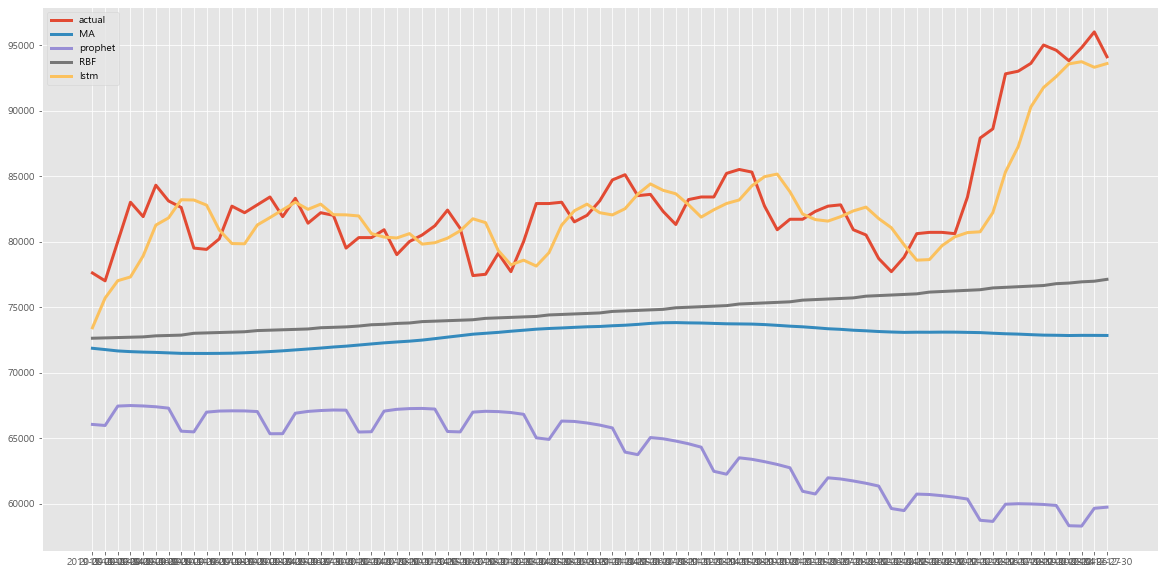

In [12]:
plt.figure(figsize=(20,10))
plt.plot(SK하이닉스['종가'],label='actual',linewidth=3.0)
plt.plot(SK하이닉스['MA'],label='MA',linewidth=3.0)
plt.plot(SK하이닉스['prophet'],label='prophet',linewidth=3.0)
plt.plot(SK하이닉스['RBF'],label='RBF',linewidth=3.0)
plt.plot(SK하이닉스['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [13]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(SK하이닉스['종가'])-SK하이닉스['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(SK하이닉스['종가'])-SK하이닉스['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(SK하이닉스['종가'])-SK하이닉스['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(SK하이닉스['종가'])-SK하이닉스['lstm']),2)))
#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(SK하이닉스['종가'])-SK하이닉스['MA']),SK하이닉스['종가']),0),SK하이닉스['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(SK하이닉스['종가'])-SK하이닉스['prophet']),SK하이닉스['종가']),0),SK하이닉스['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(SK하이닉스['종가'])-SK하이닉스['RBF']),SK하이닉스['종가']),0),SK하이닉스['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(SK하이닉스['종가'])-SK하이닉스['lstm']),SK하이닉스['종가']),0),SK하이닉스['종가'].shape[0])
SK하이닉스_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}

SK하이닉스_testerror=pd.DataFrame(SK하이닉스_testerror)
SK하이닉스_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [14]:
SK하이닉스_testerror

,RMSE,MAPE
MA,11238.709681,0.122002
prophet,20132.851992,0.225657
SVR RBF Kernel,9277.136173,0.099627
lstm,2612.076887,0.024298


# CJ대한통운

In [15]:
lstm_cj=[]
lstm_cj=lstm['CJ대한통운']
lstm_cj=pd.DataFrame(lstm_cj)
lstm_cj.rename(columns={'CJ대한통운':'lstm'},inplace=True)
CJ대한통운=pd.concat([CJ대한통운,lstm_cj],axis=1)

In [16]:
CJ대한통운.index=CJ대한통운['날짜']
CJ대한통운=CJ대한통운.drop(['날짜'],axis=1)

In [17]:
CJ대한통운.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,146000.0,143896.341463,142649.080777,139996.814084,140238.21875
2019-09-03,142000.0,143681.662701,142495.548865,140091.625983,142604.75000
2019-09-04,142500.0,143482.658587,142341.403882,145121.356688,145506.34375
2019-09-05,140000.0,143336.105643,142186.648052,145252.089670,142781.81250
2019-09-06,136500.0,143181.667907,142031.283620,145105.467803,142315.03125


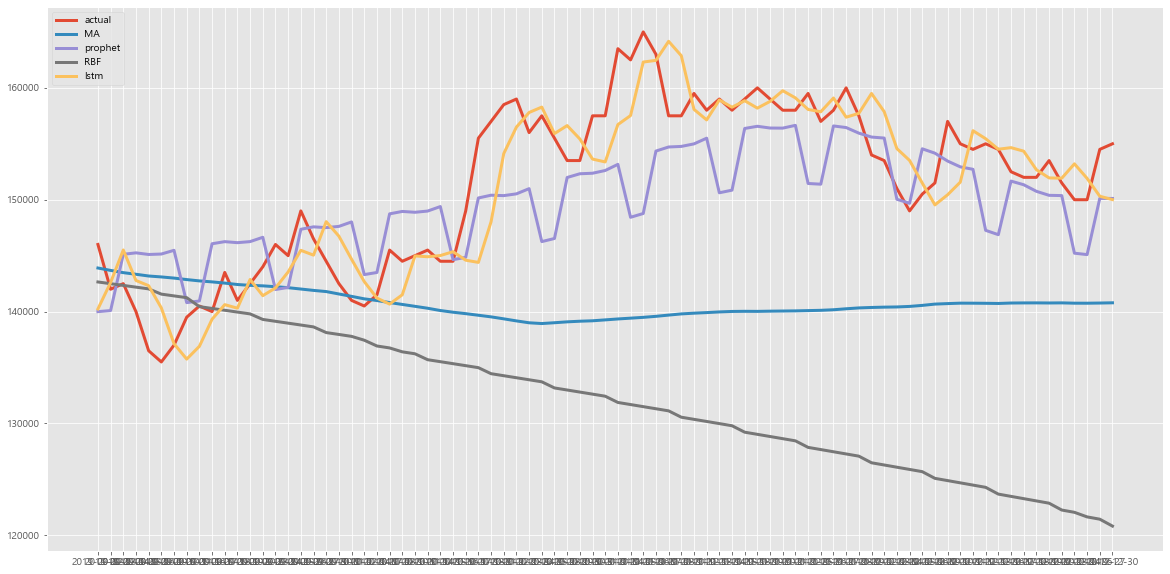

In [18]:
plt.figure(figsize=(20,10))
plt.plot(CJ대한통운['종가'],label='actual',linewidth=3.0)
plt.plot(CJ대한통운['MA'],label='MA',linewidth=3.0)
plt.plot(CJ대한통운['prophet'],label='prophet',linewidth=3.0)
plt.plot(CJ대한통운['RBF'],label='RBF',linewidth=3.0)
plt.plot(CJ대한통운['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [19]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(CJ대한통운['종가'])-CJ대한통운['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(CJ대한통운['종가'])-CJ대한통운['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(CJ대한통운['종가'])-CJ대한통운['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(CJ대한통운['종가'])-CJ대한통운['lstm']),2)))
#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(CJ대한통운['종가'])-CJ대한통운['MA']),CJ대한통운['종가']),0),CJ대한통운['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(CJ대한통운['종가'])-CJ대한통운['prophet']),CJ대한통운['종가']),0),CJ대한통운['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(CJ대한통운['종가'])-CJ대한통운['RBF']),CJ대한통운['종가']),0),CJ대한통운['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(CJ대한통운['종가'])-CJ대한통운['lstm']),CJ대한통운['종가']),0),CJ대한통운['종가'].shape[0])

CJ대한통운_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
CJ대한통운_testerror=pd.DataFrame(CJ대한통운_testerror)
CJ대한통운_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [20]:
CJ대한통운_testerror

,RMSE,MAPE
MA,13430.510626,0.073477
prophet,5384.450917,0.028803
SVR RBF Kernel,22726.924285,0.126263
lstm,3425.313300,0.017507


# DGB금융지주

In [21]:
lstm_dgb=[]
lstm_dgb=lstm['DGB금융지주']
lstm_dgb=pd.DataFrame(lstm_dgb)
lstm_dgb.rename(columns={'DGB금융지주':'lstm'},inplace=True)
DGB금융지주=pd.concat([DGB금융지주,lstm_dgb],axis=1)

In [22]:
DGB금융지주.index=DGB금융지주['날짜']
DGB금융지주=DGB금융지주.drop(['날짜'],axis=1)

In [23]:
DGB금융지주.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,6860.0,7789.268293,7662.788162,6899.862683,6836.139648
2019-09-03,6890.0,7778.283760,7661.371243,6894.574375,6875.688477
2019-09-04,7090.0,7767.165269,7659.983036,7134.144714,6898.837402
2019-09-05,7180.0,7755.911187,7658.623501,7126.783573,6926.433594
2019-09-06,7120.0,7746.471079,7657.292598,7124.561796,7004.859863


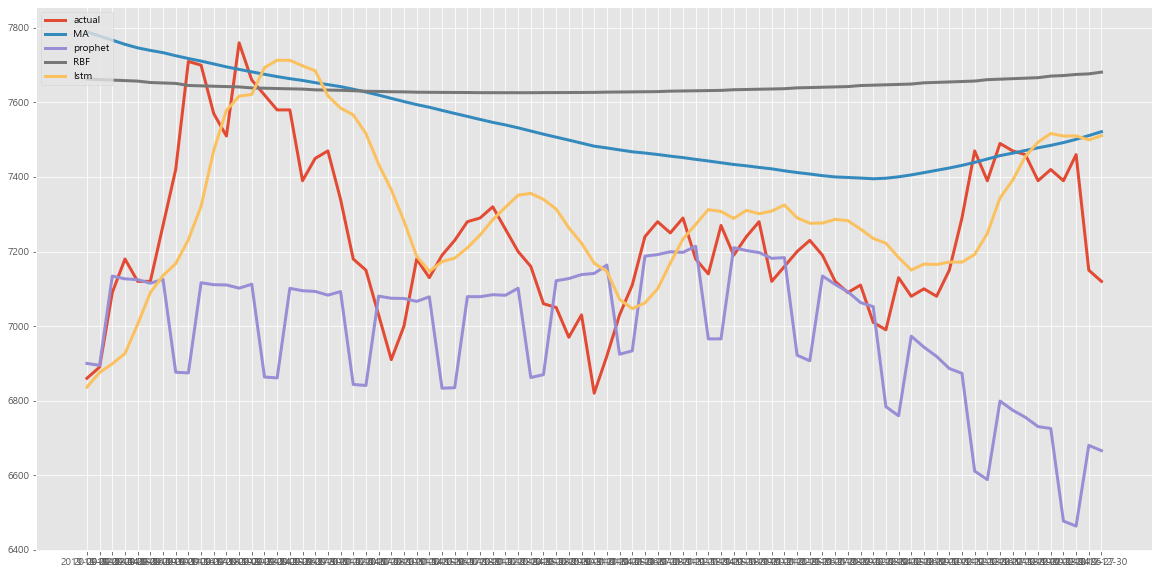

In [24]:
plt.figure(figsize=(20,10))
plt.plot(DGB금융지주['종가'],label='actual',linewidth=3.0)
plt.plot(DGB금융지주['MA'],label='MA',linewidth=3.0)
plt.plot(DGB금융지주['prophet'],label='prophet',linewidth=3.0)
plt.plot(DGB금융지주['RBF'],label='RBF',linewidth=3.0)
plt.plot(DGB금융지주['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [25]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(DGB금융지주['종가'])-DGB금융지주['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(DGB금융지주['종가'])-DGB금융지주['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(DGB금융지주['종가'])-DGB금융지주['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(DGB금융지주['종가'])-DGB금융지주['lstm']),2)))

#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(DGB금융지주['종가'])-DGB금융지주['MA']),DGB금융지주['종가']),0),DGB금융지주['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(DGB금융지주['종가'])-DGB금융지주['prophet']),DGB금융지주['종가']),0),DGB금융지주['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(DGB금융지주['종가'])-DGB금융지주['RBF']),DGB금융지주['종가']),0),DGB금융지주['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(DGB금융지주['종가'])-DGB금융지주['lstm']),DGB금융지주['종가']),0),DGB금융지주['종가'].shape[0])

DGB금융지주_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
DGB금융지주_testerror=pd.DataFrame(DGB금융지주_testerror)
DGB금융지주_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [26]:
DGB금융지주_testerror

,RMSE,MAPE
MA,364.229932,0.042595
prophet,387.303303,0.039252
SVR RBF Kernel,450.602255,0.057225
lstm,192.821523,0.021308


# GS건설

In [27]:
lstm_gs=[]
lstm_gs=lstm['GS건설']
lstm_gs=pd.DataFrame(lstm_gs)
lstm_gs.rename(columns={'GS건설':'lstm'},inplace=True)
GS건설=pd.concat([GS건설,lstm_gs],axis=1)

In [28]:
GS건설.index=GS건설['날짜']
GS건설=GS건설.drop(['날짜'],axis=1)

In [29]:
GS건설.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,31900.0,36849.390244,33326.625483,38271.817742,30960.367188
2019-09-03,31900.0,36809.748662,33250.488176,38493.053889,31613.724609
2019-09-04,31750.0,36767.184621,33174.167870,40365.278826,31374.287109
2019-09-05,32300.0,36747.272238,33097.666009,40639.190496,31324.634766
2019-09-06,32050.0,36731.385314,33020.984040,40871.723339,31200.482422


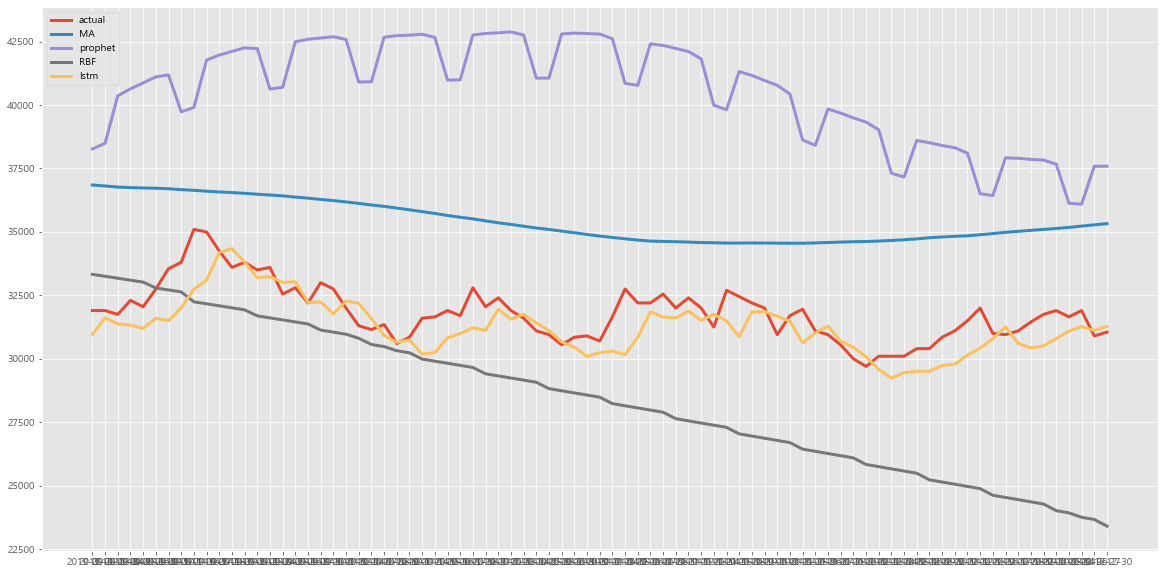

In [30]:
plt.figure(figsize=(20,10))
plt.plot(GS건설['종가'],label='actual',linewidth=3.0)
plt.plot(GS건설['MA'],label='MA',linewidth=3.0)
plt.plot(GS건설['prophet'],label='prophet',linewidth=3.0)
plt.plot(GS건설['RBF'],label='RBF',linewidth=3.0)
plt.plot(GS건설['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [31]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(GS건설['종가'])-GS건설['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(GS건설['종가'])-GS건설['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(GS건설['종가'])-GS건설['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(GS건설['종가'])-GS건설['lstm']),2)))

#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(GS건설['종가'])-GS건설['MA']),GS건설['종가']),0),GS건설['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(GS건설['종가'])-GS건설['prophet']),GS건설['종가']),0),GS건설['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(GS건설['종가'])-GS건설['RBF']),GS건설['종가']),0),GS건설['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(GS건설['종가'])-GS건설['lstm']),GS건설['종가']),0),GS건설['종가'].shape[0])

GS건설_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
GS건설_testerror=pd.DataFrame(GS건설_testerror)
GS건설_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [32]:
GS건설_testerror

,RMSE,MAPE
MA,3696.780468,0.113506
prophet,8888.263070,0.273356
SVR RBF Kernel,4137.462042,0.111431
lstm,926.222304,0.022971


# 데일리블록체인

In [33]:
lstm_daily=[]
lstm_daily=lstm['데일리블록체인']
lstm_daily=pd.DataFrame(lstm_daily)
lstm_daily.rename(columns={'데일리블록체인':'lstm'},inplace=True)
데일리블록체인=pd.concat([데일리블록체인,lstm_daily],axis=1)

In [34]:
데일리블록체인.index=데일리블록체인['날짜']
데일리블록체인=데일리블록체인.drop(['날짜'],axis=1)

In [35]:
데일리블록체인.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,670.0,1021.439024,761.365587,936.337000,671.614868
2019-09-03,671.0,1015.054134,757.479526,937.780690,703.280701
2019-09-04,685.0,1009.079185,753.600119,782.526566,714.883423
2019-09-05,684.0,1004.677712,749.727438,784.589459,719.636719
2019-09-06,673.0,1000.405488,745.861553,786.371639,730.143860


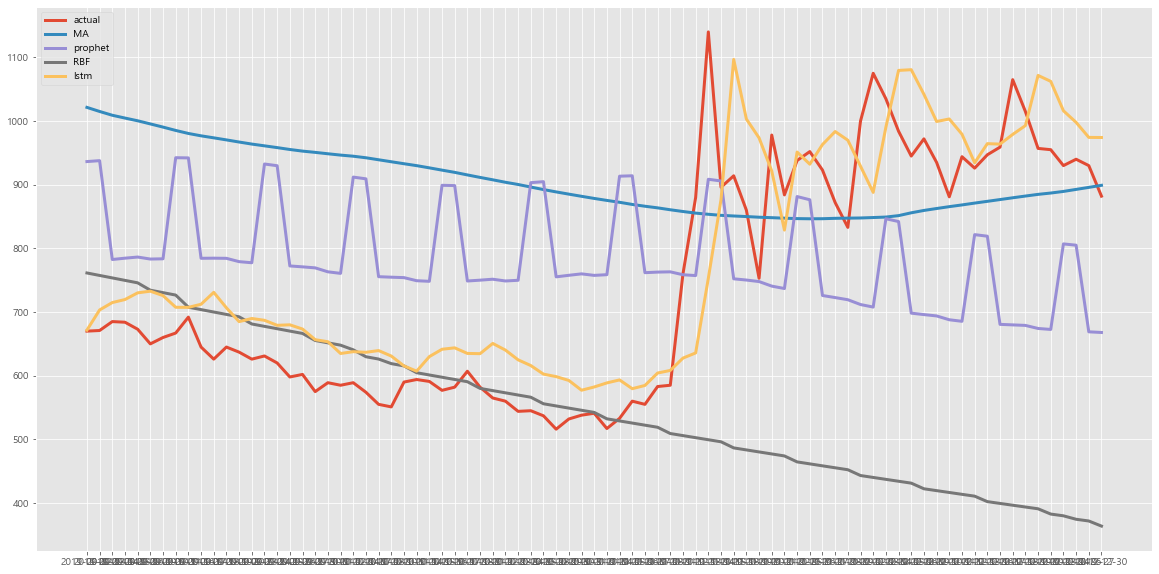

In [36]:
plt.figure(figsize=(20,10))
plt.plot(데일리블록체인['종가'],label='actual',linewidth=3.0)
plt.plot(데일리블록체인['MA'],label='MA',linewidth=3.0)
plt.plot(데일리블록체인['prophet'],label='prophet',linewidth=3.0)
plt.plot(데일리블록체인['RBF'],label='RBF',linewidth=3.0)
plt.plot(데일리블록체인['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [37]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(데일리블록체인['종가'])-데일리블록체인['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(데일리블록체인['종가'])-데일리블록체인['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(데일리블록체인['종가'])-데일리블록체인['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(데일리블록체인['종가'])-데일리블록체인['lstm']),2)))
#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(데일리블록체인['종가'])-데일리블록체인['MA']),데일리블록체인['종가']),0),데일리블록체인['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(데일리블록체인['종가'])-데일리블록체인['prophet']),데일리블록체인['종가']),0),데일리블록체인['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(데일리블록체인['종가'])-데일리블록체인['RBF']),데일리블록체인['종가']),0),데일리블록체인['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(데일리블록체인['종가'])-데일리블록체인['lstm']),데일리블록체인['종가']),0),데일리블록체인['종가'].shape[0])

데일리블록체인_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
데일리블록체인_testerror=pd.DataFrame(데일리블록체인_testerror)
데일리블록체인_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [38]:
데일리블록체인_testerror

,RMSE,MAPE
MA,268.387449,0.370961
prophet,220.947729,0.294383
SVR RBF Kernel,332.952941,0.264688
lstm,91.851869,0.096961


# 미스터블루

In [39]:
lstm_mr=[]
lstm_mr=lstm['미스터블루']
lstm_mr=pd.DataFrame(lstm_mr)
lstm_mr.rename(columns={'미스터블루':'lstm'},inplace=True)
미스터블루=pd.concat([미스터블루,lstm_mr],axis=1)

In [40]:
미스터블루.index=미스터블루['날짜']
미스터블루=미스터블루.drop(['날짜'],axis=1)

In [41]:
미스터블루.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,9180.0,5371.036585,4758.267553,7809.408132,9285.294922
2019-09-03,9650.0,5401.537032,4774.568178,7798.140356,9335.557617
2019-09-04,9690.0,5432.409434,4790.904725,8095.022343,9417.095703
2019-09-05,9330.0,5464.999793,4807.276691,8060.382530,9917.833984
2019-09-06,8800.0,5498.353449,4823.683574,8051.549988,10025.784180


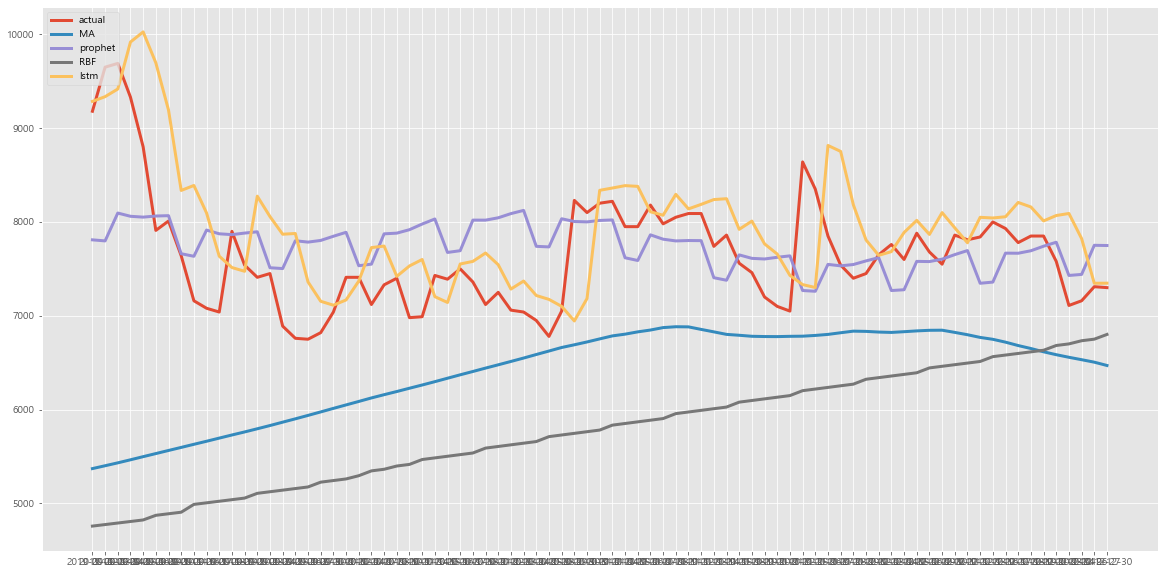

In [42]:
plt.figure(figsize=(20,10))
plt.plot(미스터블루['종가'],label='actual',linewidth=3.0)
plt.plot(미스터블루['MA'],label='MA',linewidth=3.0)
plt.plot(미스터블루['prophet'],label='prophet',linewidth=3.0)
plt.plot(미스터블루['RBF'],label='RBF',linewidth=3.0)
plt.plot(미스터블루['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [43]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(미스터블루['종가'])-미스터블루['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(미스터블루['종가'])-미스터블루['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(미스터블루['종가'])-미스터블루['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(미스터블루['종가'])-미스터블루['lstm']),2)))

#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(미스터블루['종가'])-미스터블루['MA']),미스터블루['종가']),0),미스터블루['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(미스터블루['종가'])-미스터블루['prophet']),미스터블루['종가']),0),미스터블루['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(미스터블루['종가'])-미스터블루['RBF']),미스터블루['종가']),0),미스터블루['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(미스터블루['종가'])-미스터블루['lstm']),미스터블루['종가']),0),미스터블루['종가'].shape[0])

미스터블루_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
미스터블루_testerror=pd.DataFrame(미스터블루_testerror)
미스터블루_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [44]:
미스터블루_testerror

,RMSE,MAPE
MA,1484.881851,0.157111
prophet,638.831179,0.065146
SVR RBF Kernel,2066.556156,0.239279
lstm,600.376779,0.060363


# 삼성전자

In [45]:
lstm_ss=[]
lstm_ss=lstm['삼성']
lstm_ss=pd.DataFrame(lstm_ss)
lstm_ss.rename(columns={'삼성':'lstm'},inplace=True)
삼성전자=pd.concat([삼성전자,lstm_ss],axis=1)

In [46]:
삼성전자.index=삼성전자['날짜']
삼성전자=삼성전자.drop(['날짜'],axis=1)

In [47]:
삼성전자.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,43800.0,44492.073171,201077.602363,22200.755929,36948.218750
2019-09-03,43250.0,44487.708209,205143.967986,21997.063375,37364.648438
2019-09-04,44100.0,44490.607090,209235.395589,22745.493321,37234.984375
2019-09-05,45700.0,44515.492542,213351.774007,22491.878397,36783.667969
2019-09-06,46300.0,44535.193671,217492.991522,22607.707124,37408.453125


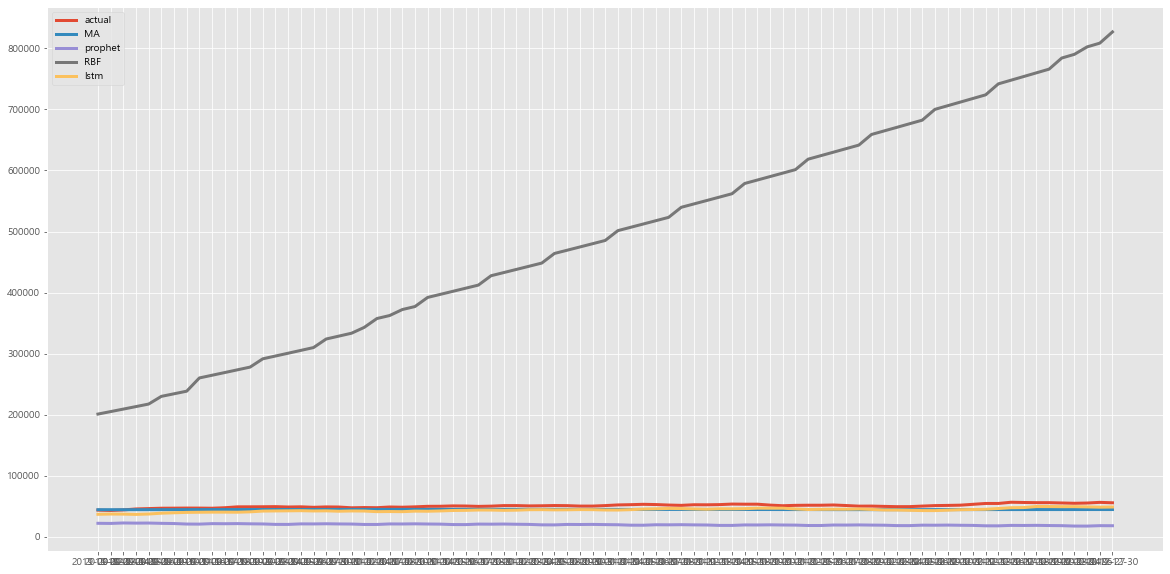

In [48]:
plt.figure(figsize=(20,10))
plt.plot(삼성전자['종가'],label='actual',linewidth=3.0)
plt.plot(삼성전자['MA'],label='MA',linewidth=3.0)
plt.plot(삼성전자['prophet'],label='prophet',linewidth=3.0)
plt.plot(삼성전자['RBF'],label='RBF',linewidth=3.0)
plt.plot(삼성전자['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [49]:
삼성전자['RBF2']=삼성전자['RBF']/10

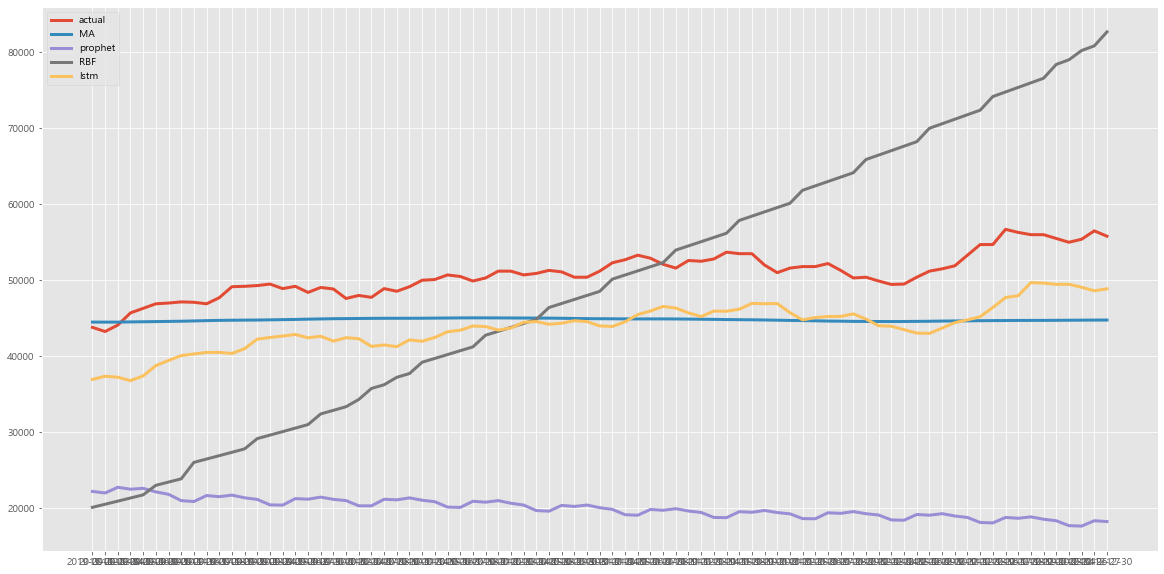

In [50]:
plt.figure(figsize=(20,10))
plt.plot(삼성전자['종가'],label='actual',linewidth=3.0)
plt.plot(삼성전자['MA'],label='MA',linewidth=3.0)
plt.plot(삼성전자['prophet'],label='prophet',linewidth=3.0)
plt.plot(삼성전자['RBF2'],label='RBF',linewidth=3.0)
plt.plot(삼성전자['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [51]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(삼성전자['종가'])-삼성전자['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(삼성전자['종가'])-삼성전자['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(삼성전자['종가'])-삼성전자['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(삼성전자['종가'])-삼성전자['lstm']),2)))
#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(삼성전자['종가'])-삼성전자['MA']),삼성전자['종가']),0),삼성전자['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(삼성전자['종가'])-삼성전자['prophet']),삼성전자['종가']),0),삼성전자['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(삼성전자['종가'])-삼성전자['RBF']),삼성전자['종가']),0),삼성전자['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(삼성전자['종가'])-삼성전자['lstm']),삼성전자['종가']),0),삼성전자['종가'].shape[0])

삼성전자_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
삼성전자_testerror=pd.DataFrame(삼성전자_testerror)
삼성전자_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [52]:
삼성전자_testerror

,RMSE,MAPE
MA,6648.428382,0.116298
prophet,31023.899291,0.603302
SVR RBF Kernel,478480.093170,8.600168
lstm,6988.735410,0.136378


# 셀트리온

In [53]:
lstm_cel=[]
lstm_cel=lstm['셀트리온']
lstm_cel=pd.DataFrame(lstm_cel)
lstm_cel.rename(columns={'셀트리온':'lstm'},inplace=True)
셀트리온=pd.concat([셀트리온,lstm_cel],axis=1)

In [54]:
셀트리온.index=셀트리온['날짜']
셀트리온=셀트리온.drop(['날짜'],axis=1)

In [55]:
셀트리온.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,156500.0,184121.951220,147532.632489,172501.431586,156928.843750
2019-09-03,160500.0,183861.243308,147116.138732,172552.930029,157671.953125
2019-09-04,167500.0,183597.356031,146700.414701,169816.401757,157103.437500
2019-09-05,164000.0,183275.372568,146285.469104,170100.616748,159793.812500
2019-09-06,165500.0,183053.121014,145871.310612,170329.654581,166010.265625


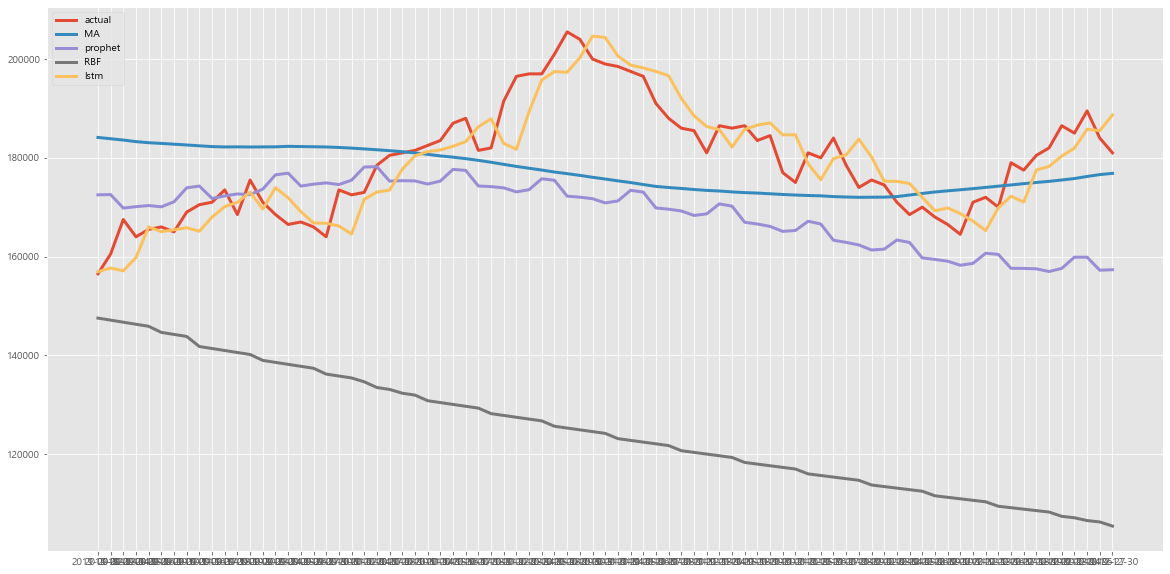

In [56]:
plt.figure(figsize=(20,10))
plt.plot(셀트리온['종가'],label='actual',linewidth=3.0)
plt.plot(셀트리온['MA'],label='MA',linewidth=3.0)
plt.plot(셀트리온['prophet'],label='prophet',linewidth=3.0)
plt.plot(셀트리온['RBF'],label='RBF',linewidth=3.0)
plt.plot(셀트리온['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [57]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(셀트리온['종가'])-셀트리온['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(셀트리온['종가'])-셀트리온['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(셀트리온['종가'])-셀트리온['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(셀트리온['종가'])-셀트리온['lstm']),2)))
#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(셀트리온['종가'])-셀트리온['MA']),셀트리온['종가']),0),셀트리온['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(셀트리온['종가'])-셀트리온['prophet']),셀트리온['종가']),0),셀트리온['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(셀트리온['종가'])-셀트리온['RBF']),셀트리온['종가']),0),셀트리온['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(셀트리온['종가'])-셀트리온['lstm']),셀트리온['종가']),0),셀트리온['종가'].shape[0])

셀트리온_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
셀트리온_testerror=pd.DataFrame(셀트리온_testerror)
셀트리온_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [58]:
셀트리온_testerror

,RMSE,MAPE
MA,13225.240983,0.061049
prophet,16052.092803,0.073970
SVR RBF Kernel,57641.548389,0.299393
lstm,5000.976095,0.023094


# 소리바다

In [59]:
lstmsori=[]
lstmsori=lstm['소리바다']
lstmsori=pd.DataFrame(lstmsori)
lstmsori.rename(columns={'소리바다':'lstm'},inplace=True)
소리바다=pd.concat([소리바다,lstmsori],axis=1)

In [60]:
소리바다.index=소리바다['날짜']
소리바다=소리바다.drop(['날짜'],axis=1)

In [61]:
소리바다.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,798.0,1058.158537,943.641401,709.496020,868.573486
2019-09-03,826.0,1056.977543,944.686731,706.897290,867.475037
2019-09-04,833.0,1055.843123,945.762218,782.147756,874.833984
2019-09-05,888.0,1055.121698,946.867867,781.666450,897.546570
2019-09-06,903.0,1054.513426,948.003687,775.608468,907.086731


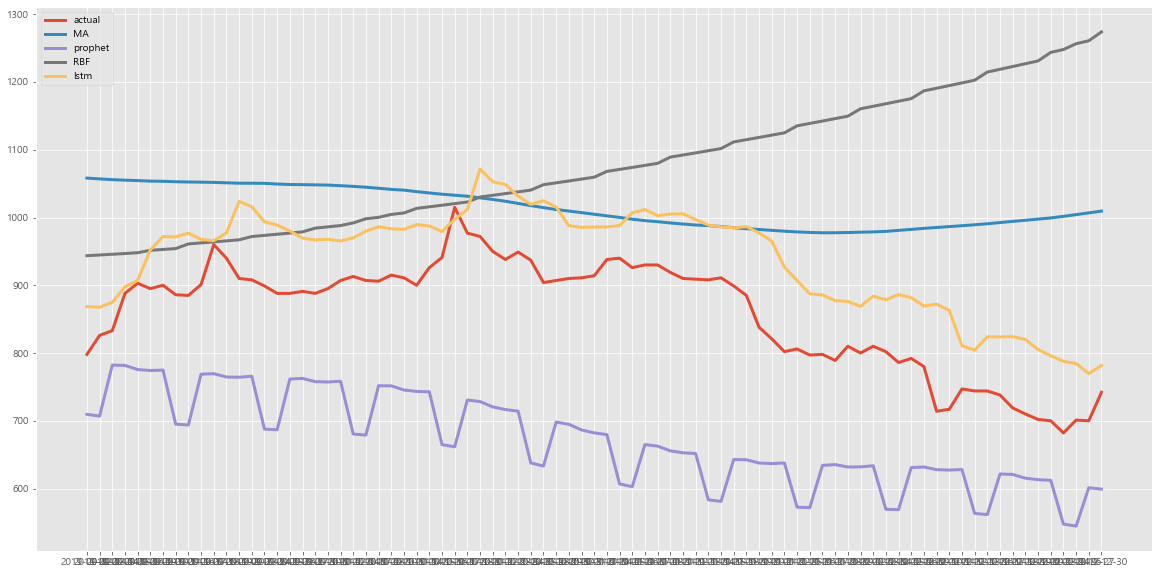

In [62]:
plt.figure(figsize=(20,10))
plt.plot(소리바다['종가'],label='actual',linewidth=3.0)
plt.plot(소리바다['MA'],label='MA',linewidth=3.0)
plt.plot(소리바다['prophet'],label='prophet',linewidth=3.0)
plt.plot(소리바다['RBF'],label='RBF',linewidth=3.0)
plt.plot(소리바다['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [63]:
소리바다['prophet2']=소리바다['prophet']/2

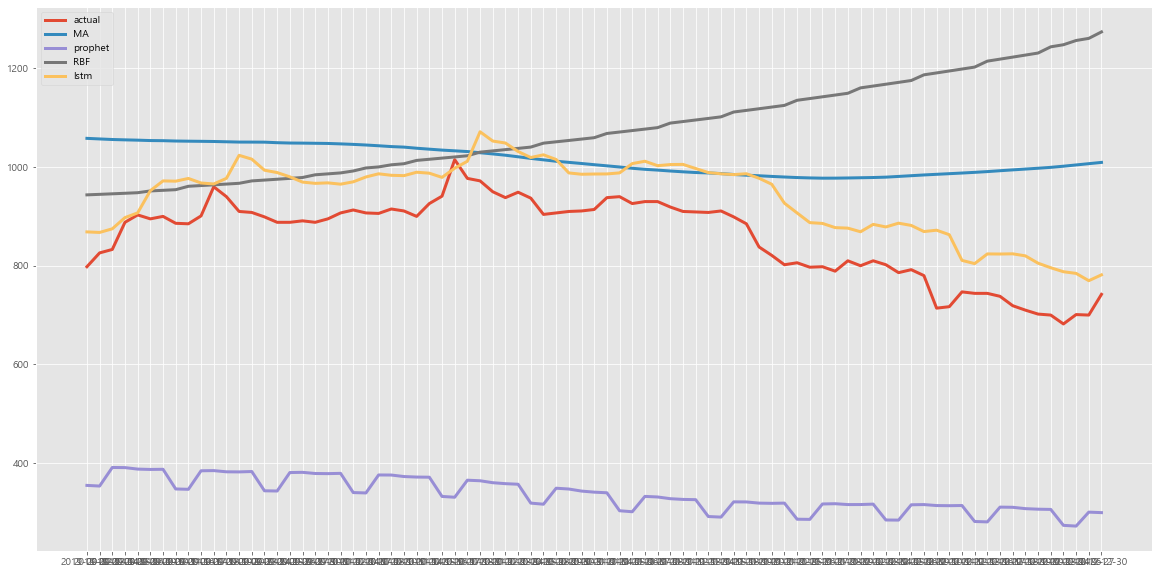

In [64]:
plt.figure(figsize=(20,10))
plt.plot(소리바다['종가'],label='actual',linewidth=3.0)
plt.plot(소리바다['MA'],label='MA',linewidth=3.0)
plt.plot(소리바다['prophet2'],label='prophet',linewidth=3.0)
plt.plot(소리바다['RBF'],label='RBF',linewidth=3.0)
plt.plot(소리바다['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [65]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(소리바다['종가'])-소리바다['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(소리바다['종가'])-소리바다['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(소리바다['종가'])-소리바다['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(소리바다['종가'])-소리바다['lstm']),2)))
#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(소리바다['종가'])-소리바다['MA']),소리바다['종가']),0),소리바다['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(소리바다['종가'])-소리바다['prophet']),소리바다['종가']),0),소리바다['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(소리바다['종가'])-소리바다['RBF']),소리바다['종가']),0),소리바다['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(소리바다['종가'])-소리바다['lstm']),소리바다['종가']),0),소리바다['종가'].shape[0])

소리바다_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
소리바다_testerror=pd.DataFrame(소리바다_testerror)
소리바다_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [66]:
소리바다_testerror

,RMSE,MAPE
MA,171.625871,0.191190
prophet,199.143006,0.215641
SVR RBF Kernel,273.771667,0.273624
lstm,85.316100,0.095445


# 씨젠

In [67]:
lstm_sea=[]
lstm_sea=lstm['씨젠']
lstm_sea=pd.DataFrame(lstm_sea)
lstm_sea.rename(columns={'씨젠':'lstm'},inplace=True)
씨젠=pd.concat([씨젠,lstm_sea],axis=1)

In [68]:
씨젠.index=씨젠['날짜']
씨젠=씨젠.drop(['날짜'],axis=1)

In [69]:
씨젠.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,22250.0,24896.951220,24650.229825,17792.347468,21505.148438
2019-09-03,21700.0,24904.231112,24687.208711,17681.393596,22022.261719
2019-09-04,21900.0,24917.087589,24724.409117,19609.566664,22597.400391
2019-09-05,21850.0,24944.125243,24761.830519,19496.538129,22378.529297
2019-09-06,21600.0,24971.492624,24799.472385,19423.614201,22438.500000


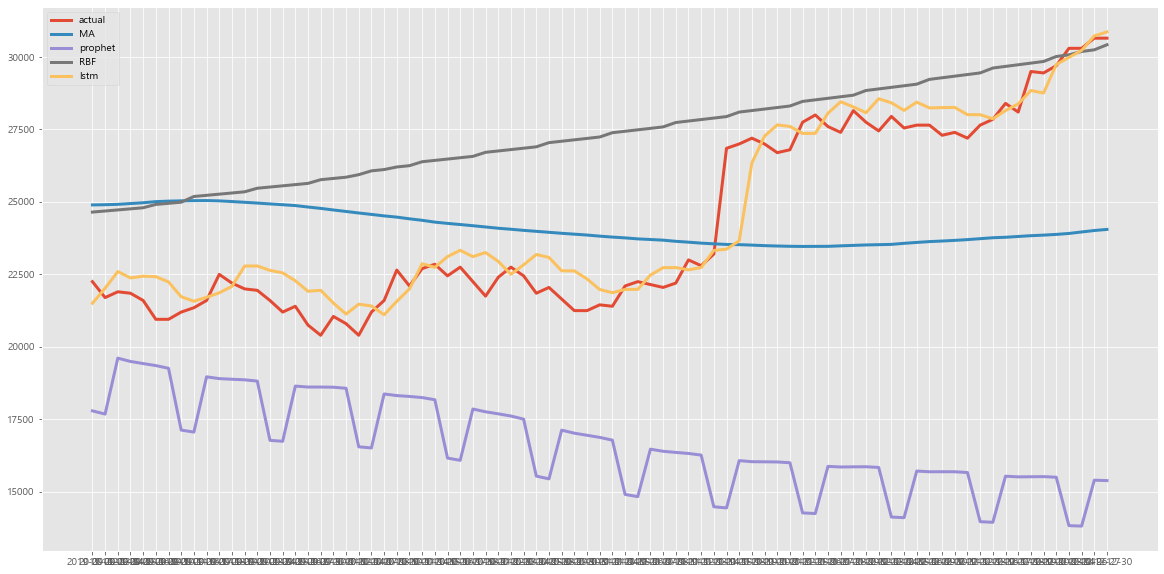

In [70]:
plt.figure(figsize=(20,10))
plt.plot(씨젠['종가'],label='actual',linewidth=3.0)
plt.plot(씨젠['MA'],label='MA',linewidth=3.0)
plt.plot(씨젠['prophet'],label='prophet',linewidth=3.0)
plt.plot(씨젠['RBF'],label='RBF',linewidth=3.0)
plt.plot(씨젠['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [71]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(씨젠['종가'])-씨젠['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(씨젠['종가'])-씨젠['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(씨젠['종가'])-씨젠['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(씨젠['종가'])-씨젠['lstm']),2)))

#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(씨젠['종가'])-씨젠['MA']),씨젠['종가']),0),씨젠['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(씨젠['종가'])-씨젠['prophet']),씨젠['종가']),0),씨젠['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(씨젠['종가'])-씨젠['RBF']),씨젠['종가']),0),씨젠['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(씨젠['종가'])-씨젠['lstm']),씨젠['종가']),0),씨젠['종가'].shape[0])

씨젠_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
씨젠_testerror=pd.DataFrame(씨젠_testerror)
씨젠_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [72]:
씨젠_testerror

,RMSE,MAPE
MA,3549.421184,0.133205
prophet,8791.319921,0.296449
SVR RBF Kernel,3605.473806,0.139500
lstm,898.080401,0.028809


# 아모레퍼시픽

In [73]:
lstm_am=[]
lstm_am=lstm['아모레퍼시픽']
lstm_am=pd.DataFrame(lstm_am)
lstm_am.rename(columns={'아모레퍼시픽':'lstm'},inplace=True)
아모레퍼시픽=pd.concat([아모레퍼시픽,lstm_am],axis=1)

In [74]:
아모레퍼시픽.index=아모레퍼시픽['날짜']
아모레퍼시픽=아모레퍼시픽.drop(['날짜'],axis=1)

In [75]:
아모레퍼시픽.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,131500.0,161164.634146,192108.894591,134304.655301,122328.570312
2019-09-03,141500.0,160544.690660,191808.161156,133927.529124,124881.296875
2019-09-04,139000.0,159947.674693,191506.713004,138043.771980,127300.968750
2019-09-05,141000.0,159434.841457,191204.561819,136882.250732,132606.640625
2019-09-06,136500.0,158897.461475,190901.719366,137419.237415,135352.046875


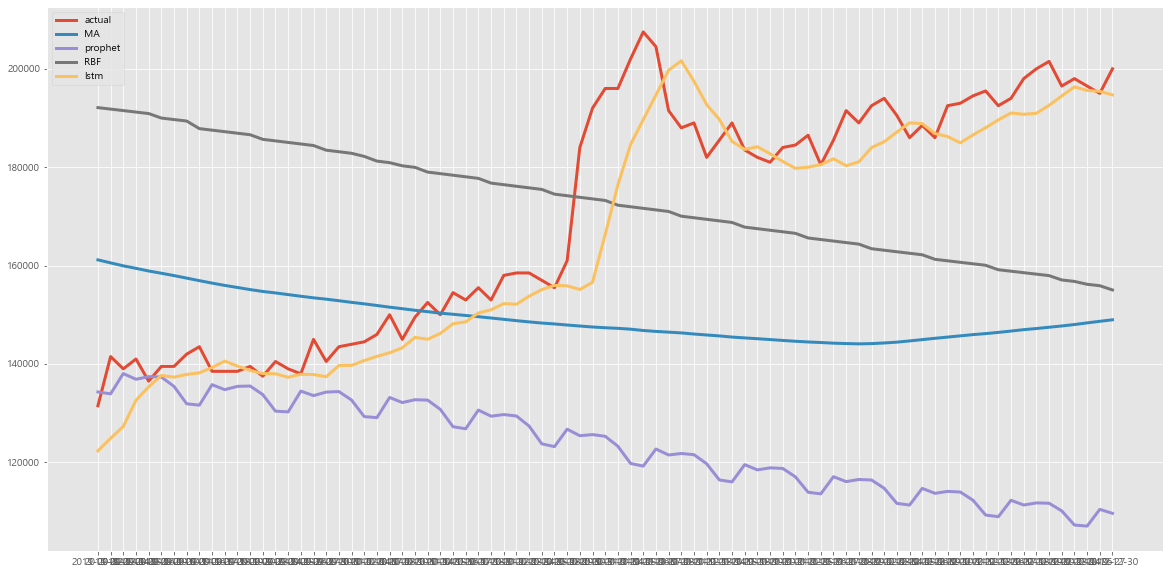

In [76]:
plt.figure(figsize=(20,10))
plt.plot(아모레퍼시픽['종가'],label='actual',linewidth=3.0)
plt.plot(아모레퍼시픽['MA'],label='MA',linewidth=3.0)
plt.plot(아모레퍼시픽['prophet'],label='prophet',linewidth=3.0)
plt.plot(아모레퍼시픽['RBF'],label='RBF',linewidth=3.0)
plt.plot(아모레퍼시픽['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [77]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(아모레퍼시픽['종가'])-아모레퍼시픽['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(아모레퍼시픽['종가'])-아모레퍼시픽['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(아모레퍼시픽['종가'])-아모레퍼시픽['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(아모레퍼시픽['종가'])-아모레퍼시픽['lstm']),2)))

#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(아모레퍼시픽['종가'])-아모레퍼시픽['MA']),아모레퍼시픽['종가']),0),아모레퍼시픽['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(아모레퍼시픽['종가'])-아모레퍼시픽['prophet']),아모레퍼시픽['종가']),0),아모레퍼시픽['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(아모레퍼시픽['종가'])-아모레퍼시픽['RBF']),아모레퍼시픽['종가']),0),아모레퍼시픽['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(아모레퍼시픽['종가'])-아모레퍼시픽['lstm']),아모레퍼시픽['종가']),0),아모레퍼시픽['종가'].shape[0])

아모레퍼시픽_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
아모레퍼시픽_testerror=pd.DataFrame(아모레퍼시픽_testerror)
아모레퍼시픽_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [78]:
아모레퍼시픽_testerror

,RMSE,MAPE
MA,34744.985165,0.164582
prophet,56878.081450,0.252852
SVR RBF Kernel,34222.482594,0.197229
lstm,9039.538038,0.035895


# 우리들휴브레인

In [79]:
lstm_our=[]
lstm_our=lstm['우리들휴브레인']
lstm_our=pd.DataFrame(lstm_our)
lstm_our.rename(columns={'우리들휴브레인':'lstm'},inplace=True)
우리들휴브레인=pd.concat([우리들휴브레인,lstm_our],axis=1)

In [80]:
우리들휴브레인.index=우리들휴브레인['날짜']
우리들휴브레인=우리들휴브레인.drop(['날짜'],axis=1)

In [81]:
우리들휴브레인.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,2180.0,2246.951220,2061.759486,1636.540556,2150.327148
2019-09-03,2225.0,2242.523795,2056.693231,1640.740159,2184.906738
2019-09-04,2210.0,2238.408232,2051.608360,2014.395573,2169.770752
2019-09-05,2310.0,2235.218088,2046.504944,2033.290534,2194.916016
2019-09-06,2310.0,2231.684163,2041.383056,2037.502418,2189.519531


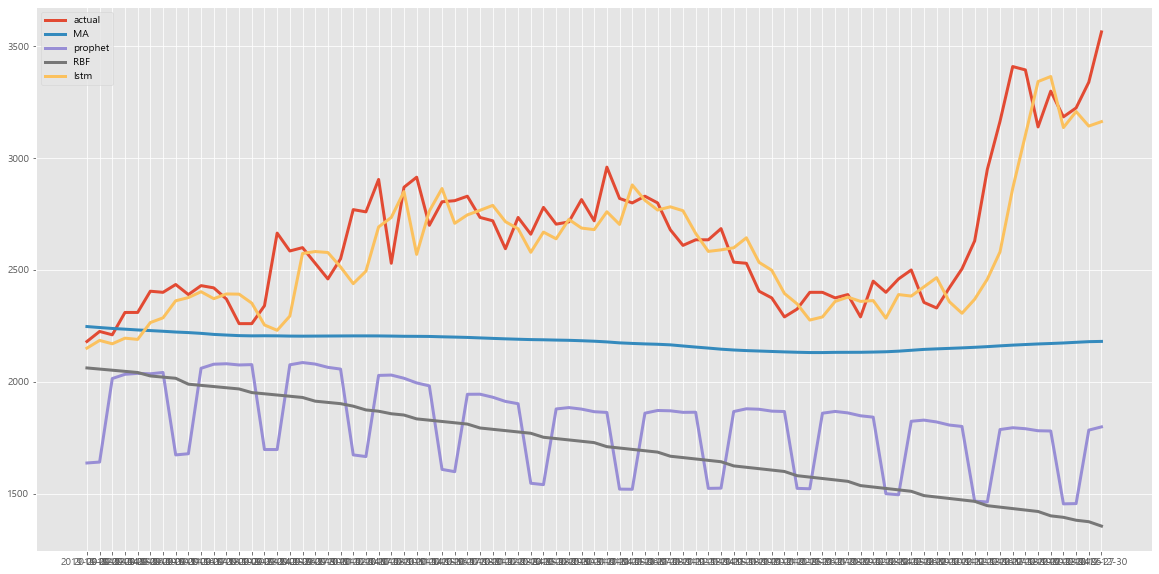

In [82]:
plt.figure(figsize=(20,10))
plt.plot(우리들휴브레인['종가'],label='actual',linewidth=3.0)
plt.plot(우리들휴브레인['MA'],label='MA',linewidth=3.0)
plt.plot(우리들휴브레인['prophet'],label='prophet',linewidth=3.0)
plt.plot(우리들휴브레인['RBF'],label='RBF',linewidth=3.0)
plt.plot(우리들휴브레인['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [83]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(우리들휴브레인['종가'])-우리들휴브레인['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(우리들휴브레인['종가'])-우리들휴브레인['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(우리들휴브레인['종가'])-우리들휴브레인['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(우리들휴브레인['종가'])-우리들휴브레인['lstm']),2)))

#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(우리들휴브레인['종가'])-우리들휴브레인['MA']),우리들휴브레인['종가']),0),우리들휴브레인['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(우리들휴브레인['종가'])-우리들휴브레인['prophet']),우리들휴브레인['종가']),0),우리들휴브레인['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(우리들휴브레인['종가'])-우리들휴브레인['RBF']),우리들휴브레인['종가']),0),우리들휴브레인['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(우리들휴브레인['종가'])-우리들휴브레인['lstm']),우리들휴브레인['종가']),0),우리들휴브레인['종가'].shape[0])

우리들휴브레인_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
우리들휴브레인_testerror=pd.DataFrame(우리들휴브레인_testerror)
우리들휴브레인_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [84]:
우리들휴브레인_testerror

,RMSE,MAPE
MA,555.316532,0.165314
prophet,913.993063,0.301894
SVR RBF Kernel,1021.084270,0.336168
lstm,174.393990,0.045903


# 한화솔루션

In [85]:
lstm_hh=[]
lstm_hh=lstm['한화솔루션']
lstm_hh=pd.DataFrame(lstm_hh)
lstm_hh.rename(columns={'한화솔루션':'lstm'},inplace=True)
한화솔루션=pd.concat([한화솔루션,lstm_hh],axis=1)

In [86]:
한화솔루션.index=한화솔루션['날짜']
한화솔루션=한화솔루션.drop(['날짜'],axis=1)

In [87]:
한화솔루션.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,17200.0,20303.048780,20849.434617,16177.076032,16592.710938
2019-09-03,17350.0,20303.695717,20860.963809,16149.241398,17084.638672
2019-09-04,17400.0,20297.643226,20872.613455,16581.810605,17024.187500
2019-09-05,17900.0,20289.687655,20884.383157,16559.640877,17153.869141
2019-09-06,17750.0,20279.805797,20896.272515,16568.002899,17210.400391


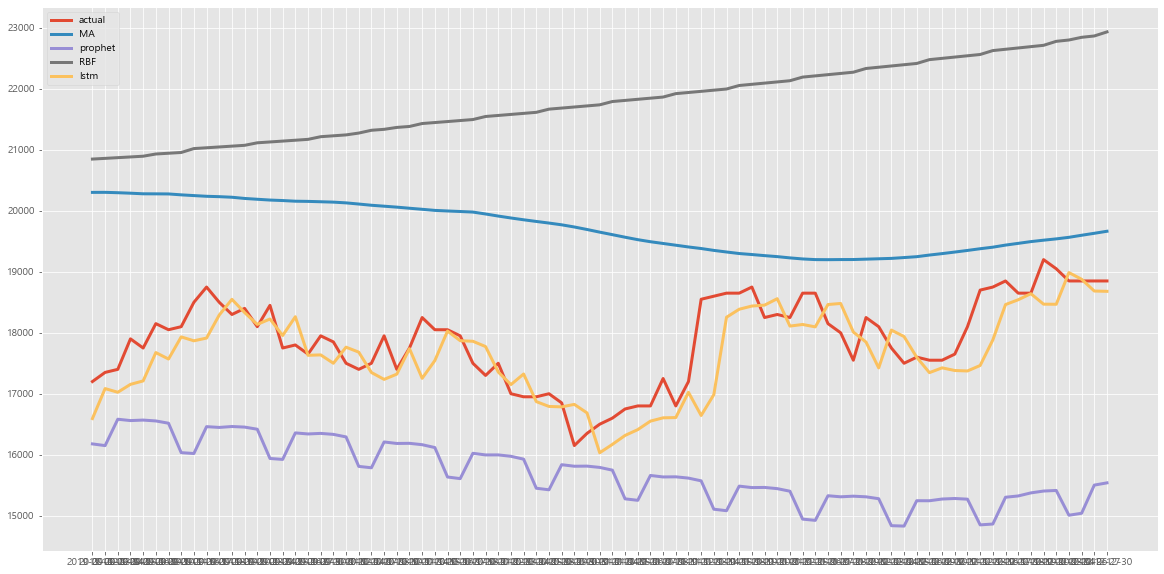

In [88]:
plt.figure(figsize=(20,10))
plt.plot(한화솔루션['종가'],label='actual',linewidth=3.0)
plt.plot(한화솔루션['MA'],label='MA',linewidth=3.0)
plt.plot(한화솔루션['prophet'],label='prophet',linewidth=3.0)
plt.plot(한화솔루션['RBF'],label='RBF',linewidth=3.0)
plt.plot(한화솔루션['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [89]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(한화솔루션['종가'])-한화솔루션['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(한화솔루션['종가'])-한화솔루션['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(한화솔루션['종가'])-한화솔루션['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(한화솔루션['종가'])-한화솔루션['lstm']),2)))

#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(한화솔루션['종가'])-한화솔루션['MA']),한화솔루션['종가']),0),한화솔루션['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(한화솔루션['종가'])-한화솔루션['prophet']),한화솔루션['종가']),0),한화솔루션['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(한화솔루션['종가'])-한화솔루션['RBF']),한화솔루션['종가']),0),한화솔루션['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(한화솔루션['종가'])-한화솔루션['lstm']),한화솔루션['종가']),0),한화솔루션['종가'].shape[0])

한화솔루션_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
한화솔루션_testerror=pd.DataFrame(한화솔루션_testerror)
한화솔루션_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [90]:
한화솔루션_testerror

,RMSE,MAPE
MA,2036.449684,0.105357
prophet,2363.711104,0.119759
SVR RBF Kernel,3982.931852,0.220188
lstm,506.750418,0.021431


# 현대차

In [91]:
lstm_hc=[]
lstm_hc=lstm['현대차']
lstm_hc=pd.DataFrame(lstm_hc)
lstm_hc.rename(columns={'현대차':'lstm'},inplace=True)
현대차=pd.concat([현대차,lstm_hc],axis=1)

In [92]:
현대차.index=현대차['날짜']
현대차=현대차.drop(['날짜'],axis=1)

In [93]:
현대차.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,131000.0,133378.048780,136785.811566,118826.365227,126491.046875
2019-09-03,128500.0,133346.073766,136922.206947,118703.577796,128012.726562
2019-09-04,128500.0,133319.806373,137059.157034,123076.858210,130304.789062
2019-09-05,128000.0,133348.096694,137196.659254,123156.458480,128644.250000
2019-09-06,127500.0,133388.927142,137334.711017,123151.856581,128341.484375


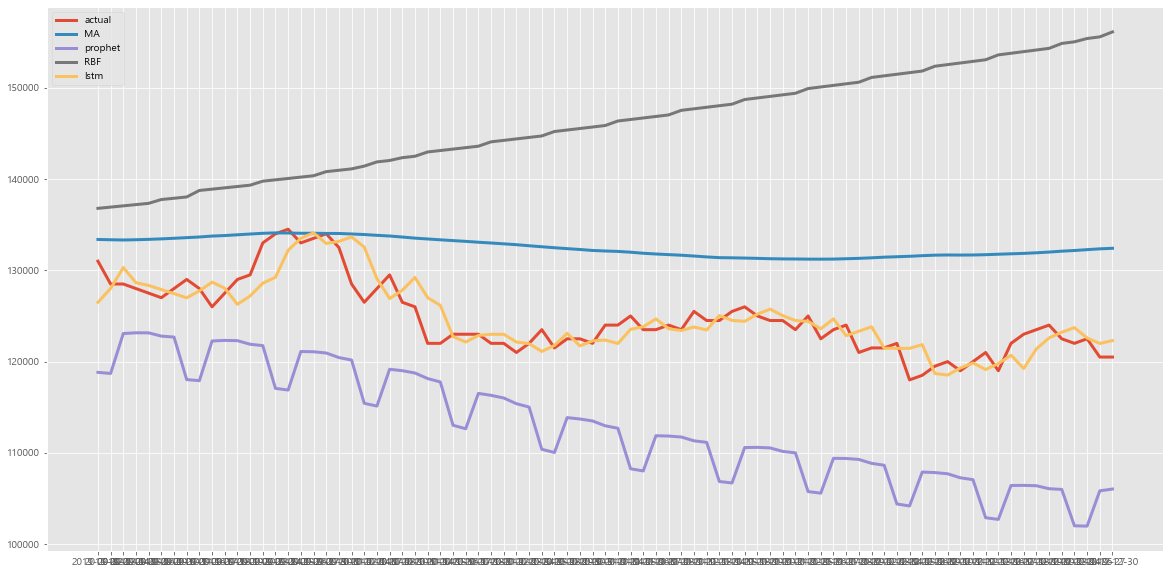

In [94]:
plt.figure(figsize=(20,10))
plt.plot(현대차['종가'],label='actual',linewidth=3.0)
plt.plot(현대차['MA'],label='MA',linewidth=3.0)
plt.plot(현대차['prophet'],label='prophet',linewidth=3.0)
plt.plot(현대차['RBF'],label='RBF',linewidth=3.0)
plt.plot(현대차['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [95]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(현대차['종가'])-현대차['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(현대차['종가'])-현대차['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(현대차['종가'])-현대차['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(현대차['종가'])-현대차['lstm']),2)))

#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(현대차['종가'])-현대차['MA']),현대차['종가']),0),현대차['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(현대차['종가'])-현대차['prophet']),현대차['종가']),0),현대차['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(현대차['종가'])-현대차['RBF']),현대차['종가']),0),현대차['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(현대차['종가'])-현대차['lstm']),현대차['종가']),0),현대차['종가'].shape[0])

현대차_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
현대차_testerror=pd.DataFrame(현대차_testerror)
현대차_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [96]:
현대차_testerror

,RMSE,MAPE
MA,8420.486803,0.063114
prophet,12581.266103,0.095038
SVR RBF Kernel,23047.125966,0.172689
lstm,2032.223958,0.012184


# NAVER

In [97]:
lstm_na=[]
lstm_na=lstm['NAVER']
lstm_na=pd.DataFrame(lstm_na)
lstm_na.rename(columns={'NAVER':'lstm'},inplace=True)
NAVER=pd.concat([NAVER,lstm_na],axis=1)

In [98]:
NAVER.index=NAVER['날짜']
NAVER=NAVER.drop(['날짜'],axis=1)

In [99]:
NAVER.head()

,종가,MA,RBF,prophet,lstm
날짜,,,,,
2019-09-02,150000.0,124158.536585,53810.004245,67281.429677,143216.406250
2019-09-03,150500.0,124160.469958,53549.661996,66512.315231,143754.656250
2019-09-04,151000.0,124168.524470,53297.228684,94115.028194,145993.671875
2019-09-05,147000.0,124231.555256,53052.708168,93066.176910,147270.593750
2019-09-06,149500.0,124252.671784,52816.104110,91787.936086,148102.984375


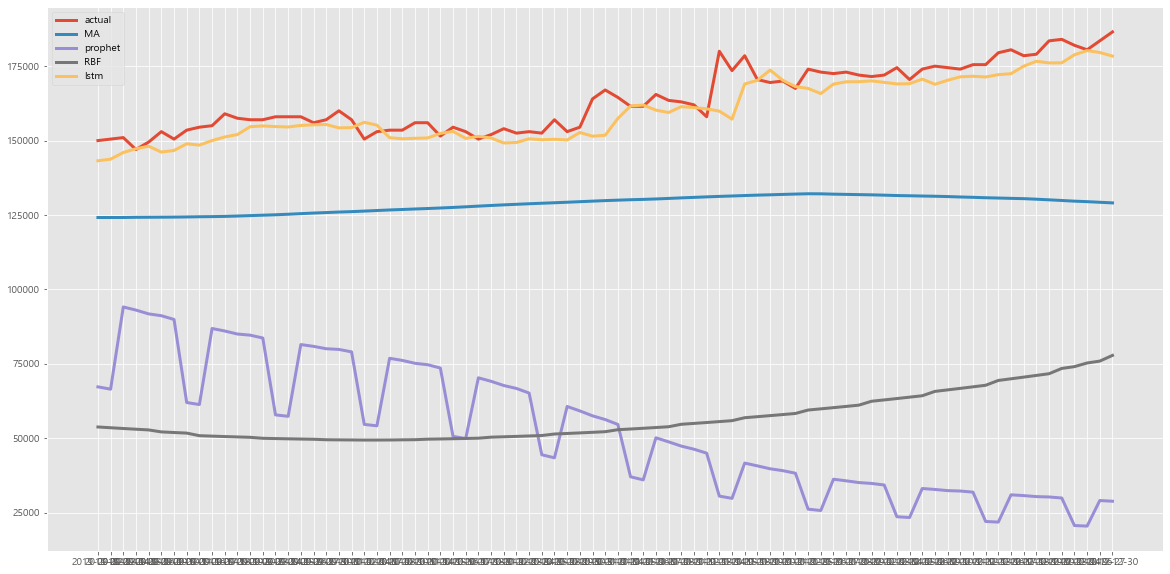

In [100]:
plt.figure(figsize=(20,10))
plt.plot(NAVER['종가'],label='actual',linewidth=3.0)
plt.plot(NAVER['MA'],label='MA',linewidth=3.0)
plt.plot(NAVER['prophet'],label='prophet',linewidth=3.0)
plt.plot(NAVER['RBF'],label='RBF',linewidth=3.0)
plt.plot(NAVER['lstm'],label='lstm',linewidth=3.0)
plt.legend(loc='upper left')

In [101]:
# rmse
MA_rmse=np.sqrt(np.mean(np.power((np.array(NAVER['종가'])-NAVER['MA']),2)))
prophet_rmse=np.sqrt(np.mean(np.power((np.array(NAVER['종가'])-NAVER['prophet']),2)))
RBF_rmse=np.sqrt(np.mean(np.power((np.array(NAVER['종가'])-NAVER['RBF']),2)))
lstm_rmse=np.sqrt(np.mean(np.power((np.array(NAVER['종가'])-NAVER['lstm']),2)))

#mape
MA_mape = np.divide(np.sum(np.divide(np.absolute(np.array(NAVER['종가'])-NAVER['MA']),NAVER['종가']),0),NAVER['종가'].shape[0])
prophet_mape = np.divide(np.sum(np.divide(np.absolute(np.array(NAVER['종가'])-NAVER['prophet']),NAVER['종가']),0),NAVER['종가'].shape[0])
RBF_mape = np.divide(np.sum(np.divide(np.absolute(np.array(NAVER['종가'])-NAVER['RBF']),NAVER['종가']),0),NAVER['종가'].shape[0])
lstm_mape = np.divide(np.sum(np.divide(np.absolute(np.array(NAVER['종가'])-NAVER['lstm']),NAVER['종가']),0),NAVER['종가'].shape[0])

NAVER_testerror={'RMSE':[MA_rmse,prophet_rmse,RBF_rmse,lstm_rmse],'MAPE':[MA_mape,prophet_mape,RBF_mape,lstm_mape]}
NAVER_testerror=pd.DataFrame(NAVER_testerror)
NAVER_testerror.index=['MA','prophet','SVR RBF Kernel','lstm']

In [102]:
NAVER_testerror

,RMSE,MAPE
MA,36301.172094,0.212014
prophet,115465.801438,0.669911
SVR RBF Kernel,107204.317830,0.654917
lstm,5593.475993,0.026029
